In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('WELFake_Dataset.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,72134.0,36066.500000,20823.436496,0.0,18033.25,36066.5,54099.75,72133.0
label,72134.0,0.514404,0.499796,0.0,0.00,1.0,1.00,1.0


In [4]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [5]:
df = df.fillna(' ')

In [6]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [7]:
df.label.value_counts()

label
1    37106
0    35028
Name: count, dtype: int64

In [8]:
df.label.mean()

0.5144037485790335

In [9]:
df.drop(["Unnamed: 0"],axis=1, inplace=True)

In [10]:
df["content"] = df["title"] + df["text"]
df["length"] = df["content"].apply(lambda x:len(x) - x.count(' '))
df.head()

,title,text,label,content,length
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222
1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?,39
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6811
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,1668


In [11]:
df[['length', 'label']].value_counts()

length  label
73      1        34
2001    1        30
1793    1        28
471     0        28
1726    1        27
                 ..
3998    1         1
6923    1         1
6924    0         1
6925    0         1
122556  1         1
Name: count, Length: 14853, dtype: int64

In [12]:
df1 = df[df['length'] < df['length'].quantile(0.80)]

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='length', ylabel='Density'>

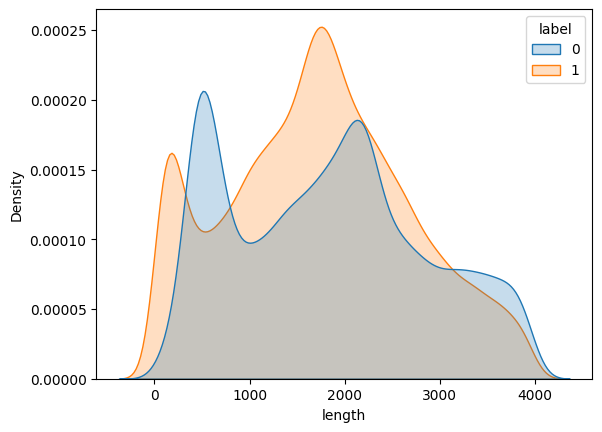

In [14]:
sns.kdeplot(data = df1, x='length', hue='label', fill=True)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df.columns

Index(['title', 'text', 'label', 'content', 'length'], dtype='object')

In [17]:
X = df[['title','text','content']]

In [18]:
X

,title,text,content
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,,Did they post their votes for Hillary already?,Did they post their votes for Hillary already?
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",SATAN 2: Russia unvelis an image of its terrif...
...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,Russians steal research on Trump in hack of U....
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",WATCH: Giuliani Demands That Democrats Apolog...
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,Trump tussle gives unpopular Mexican leader mu...


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,df['label'],test_size=0.15, random_state=42)

In [20]:
print(len(X_train),len(X_test),len(y_test),len(y_train))

61313 10821 10821 61313


In [21]:
y_test.describe()

count    10821.000000
mean         0.504574
std          0.500002
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: label, dtype: float64

In [22]:
X_train

,title,text,content
50045,Twitter EXPLODES As Tortured Snowflake Trump ...,Donald Trump regularly takes a beating on Twit...,Twitter EXPLODES As Tortured Snowflake Trump ...
12035,THE VIDEO LIBERALS Don’t Want You To See: LIL ...,"Lil Wayne, whose real name is Dwayne Michael C...",THE VIDEO LIBERALS Don’t Want You To See: LIL ...
45496,Hillary Clinton Appears Disoriented And Confus...,Hillary Clinton Appears Disoriented And Conf...,Hillary Clinton Appears Disoriented And Confus...
13279,Indo-Pacific? Not from where China is sitting...,BEIJING/NEW DELHI (Reuters) - As U.S. Presiden...,Indo-Pacific? Not from where China is sitting....
25401,Trump to call Mexico's Pena Nieto in earthquak...,WASHINGTON (Reuters) - U.S. President Donald T...,Trump to call Mexico's Pena Nieto in earthquak...
...,...,...,...
37194,I’m Running Out of Popcorn – Harvey Organ,Let us have a look at the data for today \n. \...,I’m Running Out of Popcorn – Harvey OrganLet u...
6265,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...
54886,Vanguard CEO 'encouraged' by efforts to revise...,(Reuters) - Vanguard Group Chief Executive Bil...,Vanguard CEO 'encouraged' by efforts to revise...
860,High School Forced to Change Mascot over Accus...,A school district in Kentucky has canceled the...,High School Forced to Change Mascot over Accus...


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train['content'])
count_test = count_vectorizer.transform(X_test['content'])

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(count_train,y_train)

RandomForestClassifier()

In [25]:
pred = model.predict(count_test)

In [26]:
pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [27]:
results = pd.DataFrame(X_test)
results['label'] = y_test.to_numpy()
results['RF'] = pred

In [28]:
results

,title,text,content,label,RF
61370,ARNOLD SCHWARZENEGGER Sends A Message To Liber...,,ARNOLD SCHWARZENEGGER Sends A Message To Liber...,1,1
2189,WOW! “We Mexicans Need To Kill Donald Trump Be...,And now a message of peace and unity from one ...,WOW! “We Mexicans Need To Kill Donald Trump Be...,1,1
60609,Jimmy Carter recovers from dehydration scare i...,"WINNIPEG, Manitoba (Reuters) - Former U.S. Pre...",Jimmy Carter recovers from dehydration scare i...,0,0
51565,2 Friars’ Mission: Reviving a Brooklyn Church ...,"The two Franciscan friars, complete with rob...",2 Friars’ Mission: Reviving a Brooklyn Church ...,0,0
39431,Boy With Autism Makes His First Friend Ever An...,Approximately 1 in 68 children has an autism s...,Boy With Autism Makes His First Friend Ever An...,1,1
...,...,...,...,...,...
31201,Obama takes fire for,"Jindal, the Republican governor of Louisiana, ...","Obama takes fire forJindal, the Republican gov...",0,1
43166,NBC’s TRUMP-BASHING Chief White House Reporter...,The obnoxious anti-Trump Hallie Jackson of NBC...,NBC’s TRUMP-BASHING Chief White House Reporter...,1,1
49865,UK manages to go half an hour without a racist...,Next Swipe left/right UK manages to go half an...,UK manages to go half an hour without a racist...,1,1
9736,Ucla Prof Would Rather Vote For Dog Poop Than ...,Re: #UCLA PROF WOULD RATHER VOTE FOR DOG POOP ...,Ucla Prof Would Rather Vote For Dog Poop Than ...,1,1


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
acc = accuracy_score(results['label'], results['RF'])
print(acc)

0.9463081046114038


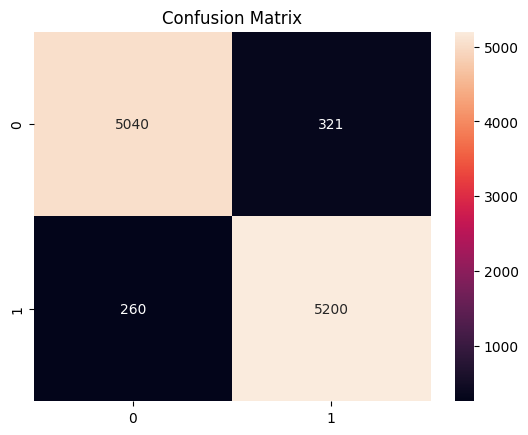

In [31]:
cm = confusion_matrix(results['label'], results['RF'])
sns.heatmap(cm,annot=True,fmt='')
plt.title('Confusion Matrix')
plt.show()